Text(0.5, 1.0, 'Transformed')

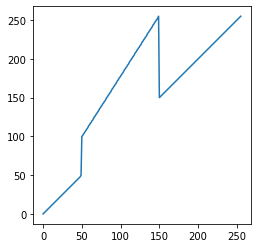

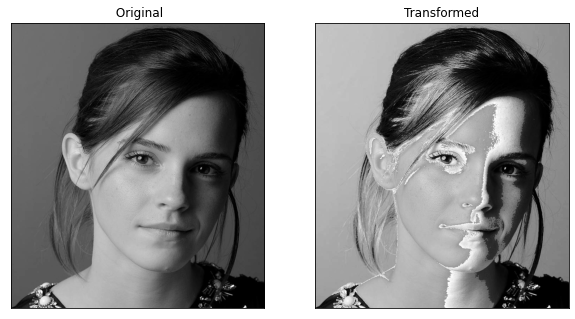

In [18]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

f = cv.imread('./assingment1_images/emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert f is not None
t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)


t = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax = plt.subplots()
ax.plot(t)
ax.set_aspect('equal')
assert len(t) == 256
g = cv.LUT(f, t)


fig,axes = plt.subplots(1,2,sharex= 'all' , sharey='all',figsize = (10,10) )
axes[0].imshow(f, cmap ='gray',vmin=0,vmax=255)
axes[0].set_title(' Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(g, cmap ='gray',vmin=0,vmax=255)
axes[1].set_title('Transformed')

([], [])

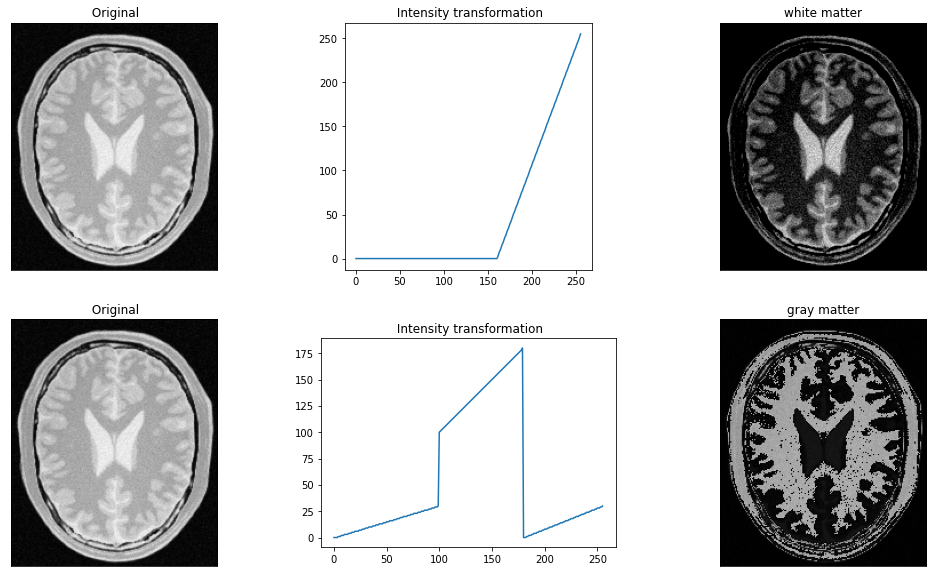

In [51]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

brain = cv.imread('./assingment1_images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

t1 = np.linspace(0,0,160)
t2 = np.linspace(0,255,96)
t = np.concatenate((t1,t2),axis=0).astype(np.uint8)
assert len(t) == 256
g = cv.LUT(brain, t)

s1 = np.linspace(0,30,100)
s2 = np.linspace(30,100,0)
s3 = np.linspace(100,180,80)
s4 = np.linspace(0,30,76)
s = np.concatenate((s1,s2,s3,s4),axis=0).astype(np.uint8)
assert len(s) == 256
g1 = cv.LUT(brain, s)



fig,axes = plt.subplots(2,3,figsize = (18,10))

axes[0,0].imshow(brain, cmap ='gray',vmin=0,vmax=255)
axes[0,0].set_title(' Original')
axes[0,0].set_xticks([]),axes[0,0].set_yticks([])
axes[0,1].plot(t)
axes[0,1].set_aspect('equal')
axes[0,1].set_title(' Intensity transformation')
axes[0,2].imshow(g, cmap ='gray',vmin=0,vmax=255)
axes[0,2].set_title('white matter')
axes[0,2].set_xticks([]),axes[0,2].set_yticks([])

axes[1,0].imshow(brain, cmap ='gray',vmin=0,vmax=255)
axes[1,0].set_title(' Original')
axes[1,0].set_xticks([]),axes[1,0].set_yticks([])
axes[1,1].plot(s)
axes[1,1].set_aspect('equal')
axes[1,1].set_title(' Intensity transformation')
axes[1,2].imshow(g1, cmap ='gray',vmin=0,vmax=255)
axes[1,2].set_title('gray matter')
axes[1,2].set_xticks([]),axes[1,2].set_yticks([])

Text(0.5, 1.0, 'Histogram of gamma corrected image')

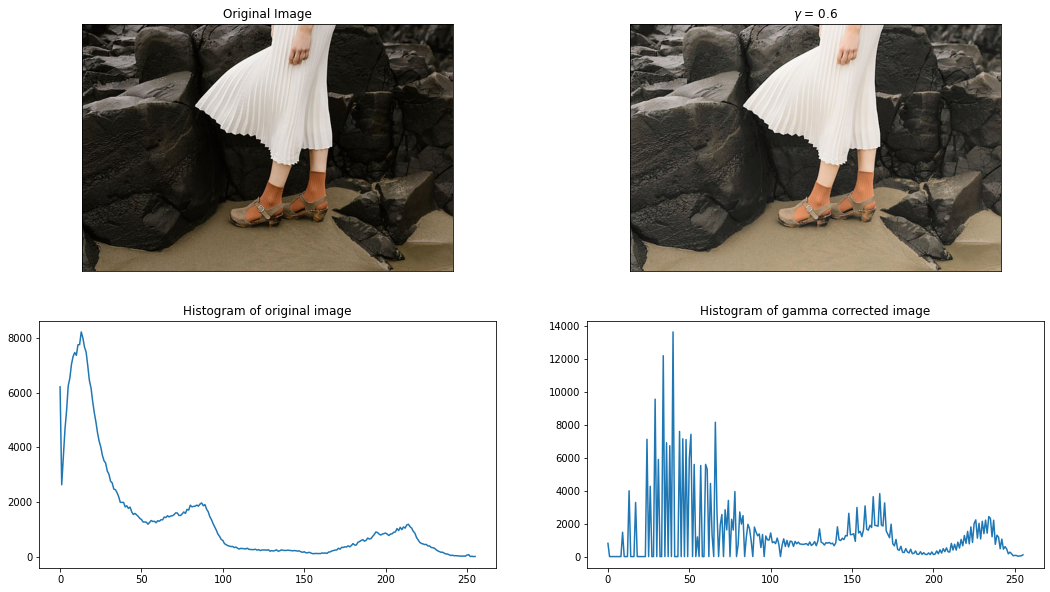

In [54]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np 
img_orig = cv.imread('./assingment1_images/highlights_and_shadows.jpg',cv.IMREAD_COLOR)
assert img_orig is not None

img_lab = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)
(L,a,b) = cv.split(img_lab)
gamma = 0.6
t = np.array([(p/255)**gamma*255 for p in range (0,256)]).astype(np.uint8)
g_transformed = cv.LUT(L, t)
img_lab[:,:,0] = g_transformed

img_orig_hist = cv.calcHist([img_orig],[0],None,[256],[0,256])
img_lab_hist = cv.calcHist([img_lab],[0],None,[256],[0,256])

fig,axes = plt.subplots(2,2,figsize = (18,10))

axes[0,0].imshow(cv.cvtColor(img_orig, cv.COLOR_BGR2RGB))
axes[0,0].set_title('Original Image')
axes[0,0].set_xticks([]),axes[0,0].set_yticks([])
axes[0,1].imshow(cv.cvtColor(img_lab, cv.COLOR_Lab2RGB))
axes[0,1].set_title("$\gamma$ = "+ str(gamma))
axes[0,1].set_xticks([]),axes[0,1].set_yticks([])

axes[1,0].plot(img_orig_hist)
axes[1,0].set_title('Histogram of original image')

axes[1,1].plot(img_lab_hist)
axes[1,1].set_title('Histogram of gamma corrected image')



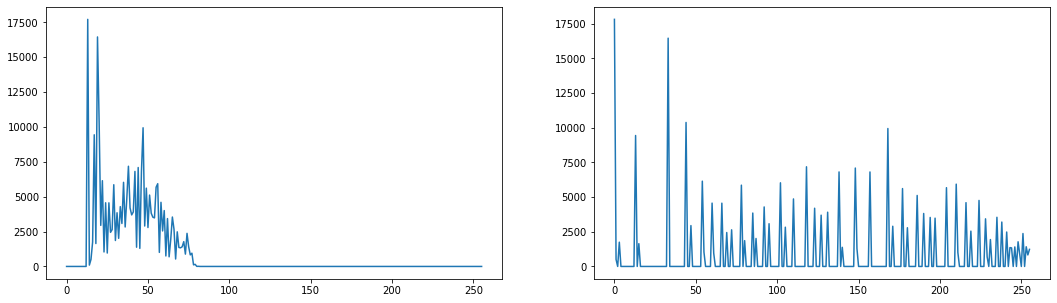

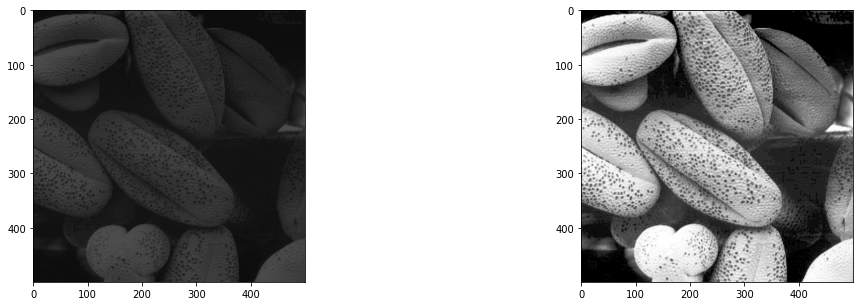

In [1]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('./assingment1_images/shells.png', cv.IMREAD_GRAYSCALE)
assert img_orig is not None

hist_f = cv.calcHist([img_orig],[0], None,[256],[0,256])
g = cv.equalizeHist(img_orig)
hist_g = cv.calcHist([g],[0], None,[256],[0,256])

fig, ax = plt.subplots(1,2, figsize=(18,5))
ax[0].plot(hist_f)
ax[1].plot(hist_g)

img_orig1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
g1 = cv.cvtColor(g, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2, figsize=(18,5))
ax[0].imshow(img_orig1)

ax[1].imshow(g1)

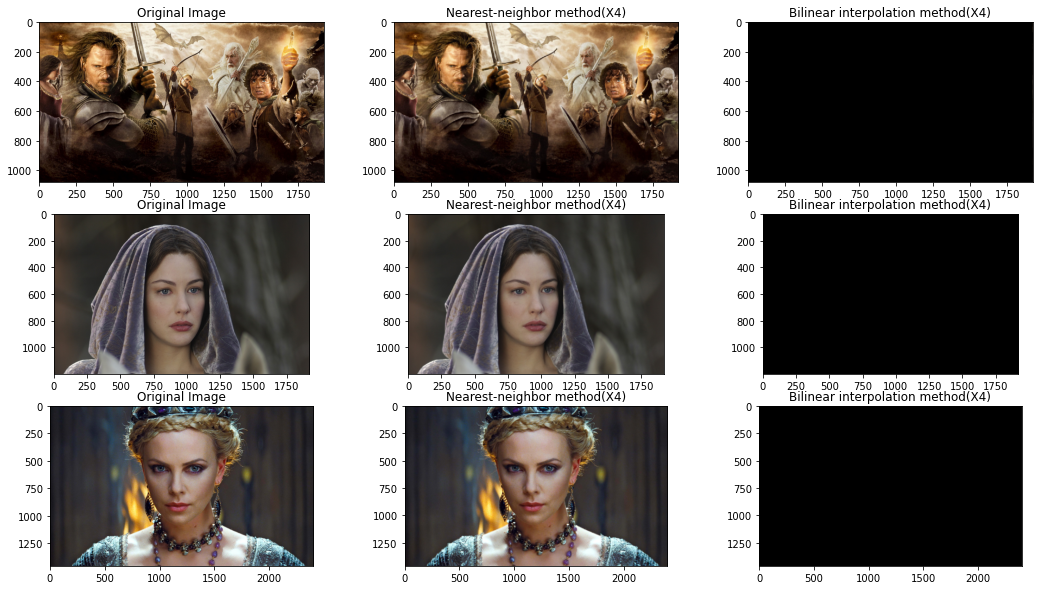

In [7]:
%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import math
#nearest-neighbor method = 1
#bilinear interpolation method = 2
def zoom_func(image,scale,method):
    rows, columns = scale*image.shape[0], scale*image.shape[1]
    zoomed_image = np.zeros((rows, columns,3), dtype = image.dtype)
    if (method == 1):
        for i in range(rows):
            for j in range(columns):
                r, c = int(np.round(i/scale)), int(np.round(j/scale))
                if r>= image.shape[0]:
                    r -= 1
                if c>= image.shape[1]:
                    c -= 1
                zoomed_image[i][j] = image[r][c]
        return zoomed_image
    if (method == 2):
        for i in range(rows-1):
            for j in range(columns-1):
                r, c = i/scale, j/scale
                top_right = [math.ceil(r), math.ceil(c)]
                top_left = [math.ceil(r),math.floor(c)]
                bottom_right = [math.floor(r), math.ceil(c)]
                bottom_left = [math.floor(r), math.floor(c)]
            if top_left[0] >= image.shape[0]:
                top_left[0] = image.shape[0] - 1
                top_right[0] = image.shape[0] - 1
            if bottom_right[1] >= image.shape[1]:
                bottom_right[1]=image.shape[1] - 1
                top_right[1] =image.shape[1] - 1
            
            v_ratio = r - bottom_left[0]
            h_ratio = c - bottom_left[1]

            h_1 = v_ratio*image[top_left[0]][top_left[1]] +(1-v_ratio)*image[bottom_left[0]][bottom_left[1]]
            h_2 = v_ratio*image[top_right[0]][top_right[1]] +(1-v_ratio)*image[bottom_right[0]][bottom_right[1]]
            zoomed_image[i][j]= np.rint(h_1*(1-h_ratio) + h_2*h_ratio)
        return zoomed_image

original_1 =  cv.imread('./assingment1_images/a1q5images/im01.png',cv.IMREAD_COLOR)
assert original_1 is not None
small_1 = cv.imread('./assingment1_images/a1q5images/im01small.png',cv.IMREAD_COLOR)
assert small_1 is not None
nearest_neighbour_1 = zoom_func(small_1, 4, 1)
bilinear_1 = zoom_func(small_1, 4, 2)

original_2 =  cv.imread('./assingment1_images/a1q5images/im02.png',cv.IMREAD_COLOR)
assert original_2 is not None
small_2 = cv.imread('./assingment1_images/a1q5images/im02small.png',cv.IMREAD_COLOR)
assert small_2 is not None
nearest_neighbour_2 = zoom_func(small_2, 4, 1)
bilinear_2 = zoom_func(small_2, 4, 2)


original_3 =  cv.imread('./assingment1_images/a1q5images/im03.png',cv.IMREAD_COLOR)
assert original_3 is not None
small_3 = cv.imread('./assingment1_images/a1q5images/im03small.png',cv.IMREAD_COLOR)
assert small_3 is not None
nearest_neighbour_3 = zoom_func(small_3, 4, 1)
bilinear_3 = zoom_func(small_3, 4, 2)

fig,axes = plt.subplots(3,3,figsize = (18,10))

axes[0][0].imshow(cv.cvtColor(original_1, cv.COLOR_BGR2RGB))
axes[0][0].set_title("Original Image")
axes[0][1].imshow(cv.cvtColor(nearest_neighbour_1, cv.COLOR_BGR2RGB))
axes[0][1].set_title("Nearest-neighbor method(X4)")
axes[0][2].imshow(cv.cvtColor(bilinear_1, cv.COLOR_BGR2RGB))
axes[0][2].set_title("Bilinear interpolation method(X4)")

axes[1][0].imshow(cv.cvtColor(original_2, cv.COLOR_BGR2RGB))
axes[1][0].set_title("Original Image")
axes[1][1].imshow(cv.cvtColor(nearest_neighbour_2, cv.COLOR_BGR2RGB))
axes[1][1].set_title("Nearest-neighbor method(X4)")
axes[1][2].imshow(cv.cvtColor(bilinear_2, cv.COLOR_BGR2RGB))
axes[1][2].set_title("Bilinear interpolation method(X4)")

axes[2][0].imshow(cv.cvtColor(original_3, cv.COLOR_BGR2RGB))
axes[2][0].set_title("Original Image")
axes[2][1].imshow(cv.cvtColor(nearest_neighbour_3, cv.COLOR_BGR2RGB))
axes[2][1].set_title("Nearest-neighbor method(X4)")
axes[2][2].imshow(cv.cvtColor(bilinear_3, cv.COLOR_BGR2RGB))
axes[2][2].set_title("Bilinear interpolation method(X4)")
plt.show()
            

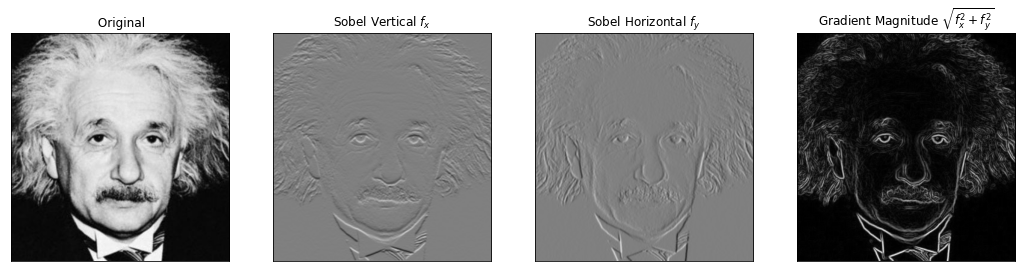

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('./assingment1_images/einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None
sobelv_kernel = np.array([(-1,-2 ,-1), (0,0,0),(1,2,1)],dtype='float32')
img_x = cv.filter2D(img,-1, sobelv_kernel)
sobelh_kernel = np.array([(-1,0,1), (-2,0,2),(-1,0,1)],dtype='float32')
img_y = cv.filter2D(img,-1, sobelh_kernel)

grad_mag = np.sqrt(img_x**2+img_y**2)

fig,axes = plt.subplots(1,4,sharex= 'all' , sharey='all',figsize = (18,6))
axes[0].imshow(img,cmap='gray',vmin=0,vmax=255)
axes[0].set_title(' Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(img_x,cmap='gray',vmin=-1020,vmax=1020)
axes[1].set_title('Sobel Vertical $f_x$')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(img_y,cmap='gray',vmin=-1020,vmax=1020)
axes[2].set_title('Sobel Horizontal $f_y$')
axes[2].set_xticks([]),axes[2].set_yticks([])
axes[3].imshow(grad_mag,cmap='gray')
axes[3].set_title('Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$')
axes[3].set_xticks([]),axes[3].set_yticks([])
plt.show()


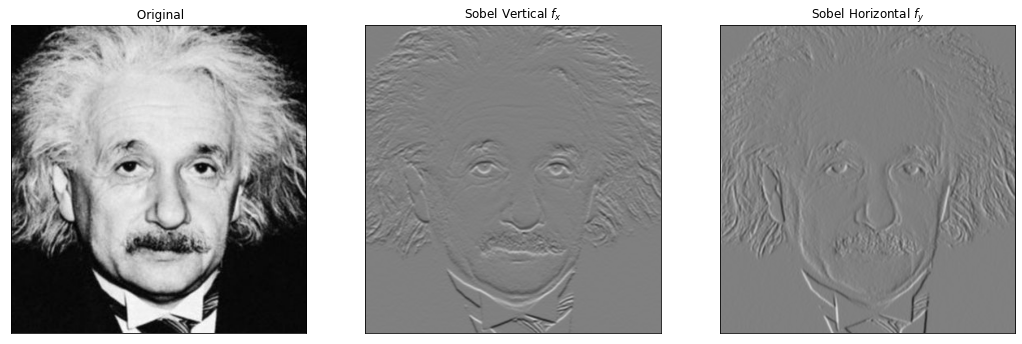

In [4]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math

img = cv.imread('./assingment1_images/einstein.png',cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

def sobel_filter(image, kernal):
    [rows, cols] = image.shape
    filtered_img = np.zeros((rows,cols),dtype=np.float32) 
    padded_array = np.zeros((rows+2, cols+2), dtype=np.float32)
    padded_array[1:rows+1, 1:cols+1] = image

    n,m = 1,1
    height=math.floor(kernal.shape[0]/2)
    if len(kernal.shape)==1:
        width = 0
        m=2
    else:
        width = math.floor(kernal.shape[1]/2)
        if kernal.shape[1]==1:
            m=2
    if kernal.shape[0]==1:
        n=2
        
    
    for row in range(height,rows+2-height-n):
        for col in range(width,cols+2-width-m):
            filtered_img[row,col]=np.dot(padded_array[row-height:row+height+1,col-width:col+width+1].flatten(),kernal.flatten())
    
    return filtered_img

img_x = sobel_filter(img, sobelv_kernel)
img_y = sobel_filter(img, sobelh_kernel)
fig,axes = plt.subplots(1,3,sharex= 'all' , sharey='all',figsize = (18,6))
axes[0].imshow(img,cmap='gray',vmin=0,vmax=255)
axes[0].set_title(' Original')
axes[0].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(img_x,cmap='gray',vmin=-1020,vmax=1020)
axes[1].set_title('Sobel Vertical $f_x$')
axes[1].set_xticks([]),axes[1].set_yticks([])
axes[2].imshow(img_y,cmap='gray',vmin=-1020,vmax=1020)
axes[2].set_title('Sobel Horizontal $f_y$')
axes[2].set_xticks([]),axes[2].set_yticks([])
plt.show()


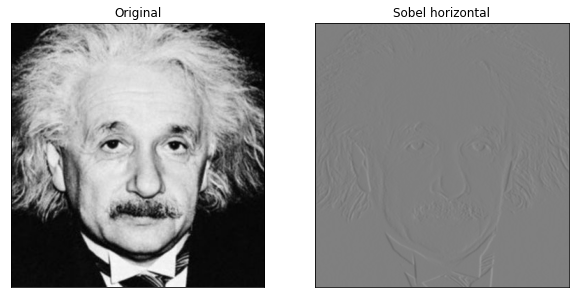

In [5]:
sobel1_kernal = np.array([(1),(2),(1)], dtype= np.float32)
sobel2_kernal = np.array([(1,0,-1)] ,dtype=np.float32)

first_filtered = sobel_filter(img, sobel1_kernal)
sencond_filtered = sobel_filter(img, sobel2_kernal)

fig, ax =plt.subplots(1,2, sharex ='all', sharey ='all', figsize=(10,10))
ax[0].imshow(img,cmap='gray',vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(sencond_filtered,cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("Sobel horizontal")
ax[1].set_xticks([]),ax[1].set_yticks([])
plt.show()


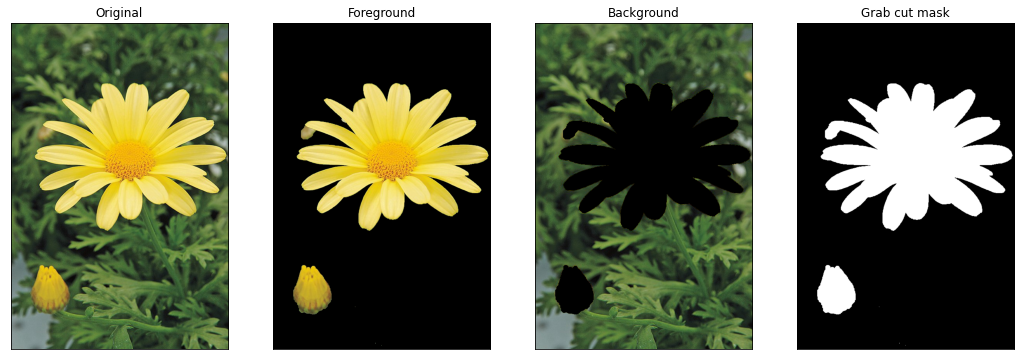

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

image =  cv.imread('./assingment1_images/daisy.jpg')
assert image is not None
mask = np.zeros(image.shape[:2],dtype=image.dtype)
rectangle= (40,40,540,800)
background_mask = np.zeros((1, 65), np.float64)
foreground_mask = np.zeros((1, 65), np.float64)

cv.grabCut(image, mask, rectangle, background_mask, foreground_mask, 15, cv.GC_INIT_WITH_RECT)

grab_cut_mask = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
img_foreground = image*grab_cut_mask[:,:,np.newaxis]
img_background =np.subtract(image,img_foreground)

fig, ax =plt.subplots(1,4, sharex ='all', sharey ='all', figsize=(18,6))

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(cv.cvtColor(img_foreground, cv.COLOR_BGR2RGB))
ax[1].set_title("Foreground")
ax[1].set_xticks([]),ax[1].set_yticks([])

ax[2].imshow(cv.cvtColor(img_background, cv.COLOR_BGR2RGB))
ax[2].set_title("Background")
ax[2].set_xticks([]),ax[2].set_yticks([])

ax[3].imshow(cv.cvtColor(255*grab_cut_mask, cv.COLOR_BGR2RGB))
ax[3].set_title("Grab cut mask")
ax[3].set_xticks([]),ax[3].set_yticks([])

plt.show()


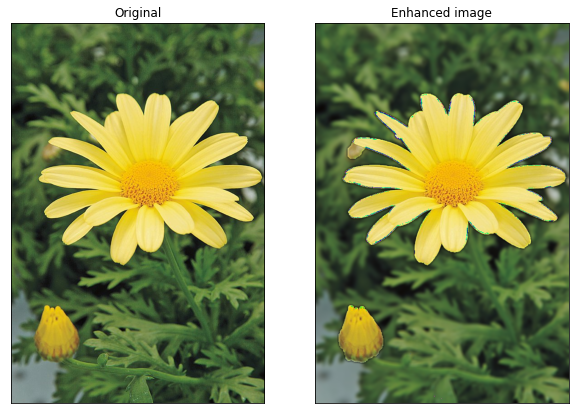

In [13]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

kernal_size = 9
sigma = 4
blurred_background =cv.GaussianBlur(img_background,(kernal_size,kernal_size),sigma)

img_enhanced=np.add(img_foreground,blurred_background)

fig, ax =plt.subplots(1,2, sharex ='all', sharey ='all', figsize=(10,10))

ax[0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(cv.cvtColor(img_enhanced, cv.COLOR_BGR2RGB))
ax[1].set_title("Enhanced image")
ax[1].set_xticks([]),ax[1].set_yticks([])

plt.show()